# DataFrames
`DataFrames.jl` is a huge package for manipulating data and it has a ton of functionality and symbiotically works with a multitude of other packages (check [here](https://dataframes.juliadata.org/stable/#DataFrames.jl-and-the-Julia-Data-Ecosystem)) that I won't be able to fully cover in this short workshop. Luckily there are many online tutorials that go into much more depth than what we explore here. (Some of the materials here have been borrowed from [here](https://github.com/bkamins/Julia-DataFrames-Tutorial), [here](https://julia.school/julia/dataframes/) and [here](https://dataframes.juliadata.org/stable/), which are a tutorials specifically for `DataFrames.jl`)

Topics:
- Construction
- Basic info
- Editing DataFrames
- Visualizing data with DataFrames

In [ ]:
using DataFrames, Random

## Construction
There are a few different methods for constructing a `DataFrame`. For example, you can construct an empty `DataFrame` and then fill it (using techniques explained later in the notebook) as:

In [ ]:
DataFrame()

Or we could call the constructor using keyword arguments to add columns to the `DataFrame`.

In [ ]:
DataFrame(A=1:3, B=rand(3), C=randstring.([3,3,3]), fixed=1)

note in column `:fixed` that scalars get automatically broadcasted.

We can create a `DataFrame` from a dictionary, in which case keys from the dictionary will be sorted to create the `DataFrame` columns.

In [ ]:
x = Dict("A" => [1,2], "B" => [true, false], "C" => ['a', 'b'], "fixed" => Ref([1,1]))
DataFrame(x)

You can also use the following methods:
- Pass the dictionary arguments directly into the dataframe
- Use a vector of vectors
- Use `NamedTuple`s
- Use a `Matrix`
- ...



Let's make a large `DataFrame` so we can play around with it:

In [ ]:
df = DataFrame(x = sort(randn(1000)), y=randn(1000), z = [fill("b", 500); fill("a", 500)]);

## Basic info

Calling a large `DataFrame` directly, only shows a section of the whole `DataFrame`.

In [ ]:
df

The `size` function works with `DataFrame`s and returns their size :)

In [ ]:
size(df)

Alternatively one could use `nrow` and `ncol` functions (similar to `R`):

In [ ]:
nrow(df),ncol(df)

`describe` gives a basic summary statistics of the data:

In [ ]:
describe(df)

`names` will return the names of all columns as strings (`propertynames` does a similar job, but returns them as symbols)

In [ ]:
names(df)

`eachcol` and `eachrow` create iterators of the columns and rows of the dataframe respectively.

In [ ]:
eltype.(eachcol(df))

`first` and `last` can be used to peak at the first and last few rows of the `DataFrame`.

In [ ]:
first(df,5)

In [ ]:
last(df, 3)

Given the `DataFrame` `df` we have created earlier, here are various ways to grab one of its columns as a `Vector`.

In [ ]:
df.x === df[!, 1] === df[!, :x] # all get the vector stored in our DataFrame without copying it

In [ ]:
df."x" === df[!, "x"]

In [ ]:
df[:,1] #note that this creates a copy

In [ ]:
df[:,1] === df[:,1] #The copies are not exactly indistinguishable!

One more important way of accessing slices of the `DataFrame` is the `@view` macro. It is more efficient than creating a materialized selection.

In [ ]:
@view df[498:503,1:3]

And as before there are a bunch of other methods for doing this same task.

## Editing `DataFrame`s

Here we show a few basic ways of editing the DataFrame values:
- Add or remove columns and rows
- You can edit values directly
- Use `select` and `select!`
- Use `transform` and `transform`
- ...

### Adding columns and rows
You can add rows (columns) using `vcat` (`hcat`). The dimensions must be compatible.

In [ ]:
df_temp = df[450:550,:]

In [ ]:
df_temp2 = vcat(df,df_temp)

In [ ]:
df_temp = DataFrame("w" => df[!,"x"].*df[!,"y"])

In [ ]:
df = hcat(df, df_temp)

### Editing values directly
As we mentioned earlier `df[i,j]]` directly accesses the dataframe and can change its values. 

In [ ]:
last(df)

In [ ]:
df[1000,4] += 1

In [ ]:
last(df)

Also, something that could potentially be dangerous is using `df[!,"x"]` instead of `df[:,"x"]`. For instance, see this:

In [ ]:
df[:,"w"]

In [ ]:
sort!(df[:,"w"])

In [ ]:
df[!,"w"]

In [ ]:
sort!(df[!,"w"])

In [ ]:
df[!,"w"]

### The `select` and `select!` functions
These are powerful tools for editing a dataframe. The only difference between them is that `select` creates a new `DataFrame` and doesn't touch the original, while `select!` mutates the original `DataFrame`. Let's see some of its applications:

In [ ]:
select(df, Not(:w)) # drop column :w in a new data frame

In [ ]:
select(df, :x => :a1, :y => :a2) # rename columns

In [ ]:
select(df, :w, :w => ByRow(abs)) # transform columns by row

## Visualizing data with `DataFrames.jl`
`DataFrames.jl` works closely with a large number of different packages, including `Plots.jl`. This allows us to do things like:

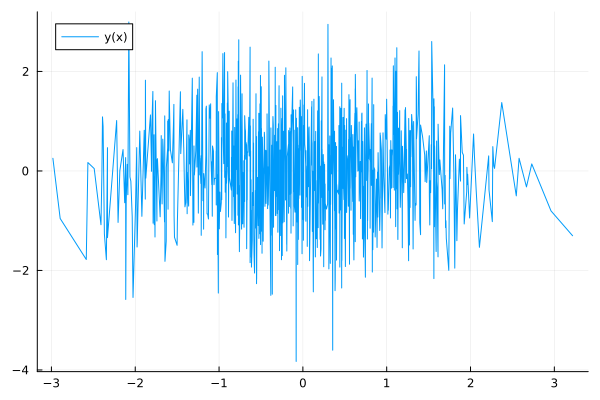

In [55]:
using Plots, StatsPlots
default(fmt = :png)
@df df plot(:x, :y, legend=:topleft, label="y(x)") # a most basic plot

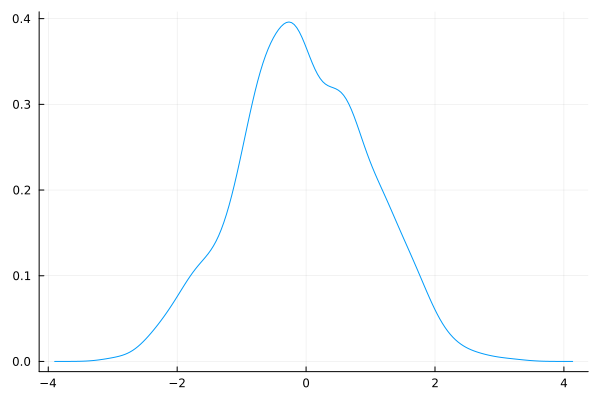

In [56]:
@df df density(:x, label="") # density plot

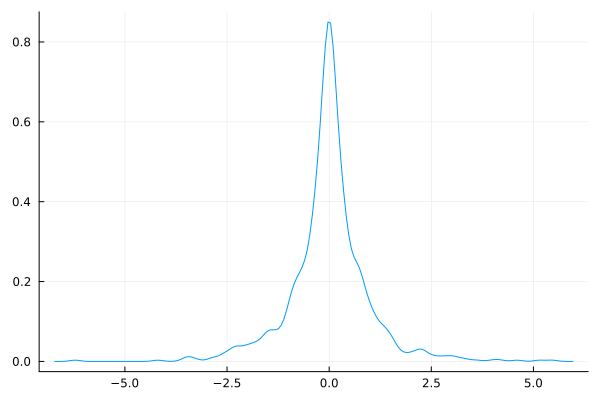

In [57]:
@df df density(:w, label="") # density plot

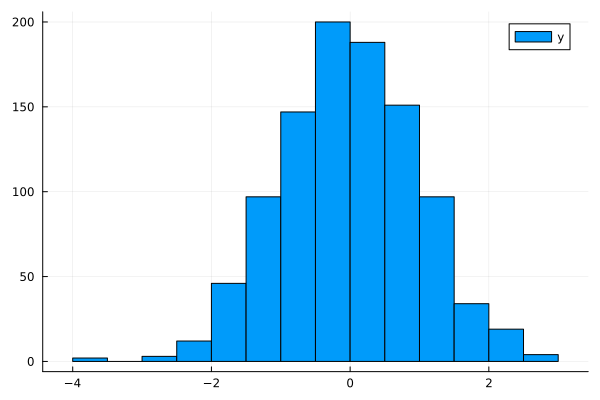

In [58]:
@df df histogram(:y, label="y") # and a histogram

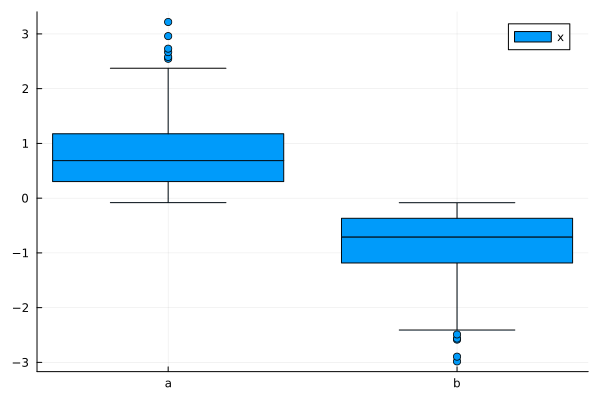

In [60]:
@df df boxplot(:z, :x, label="x") 

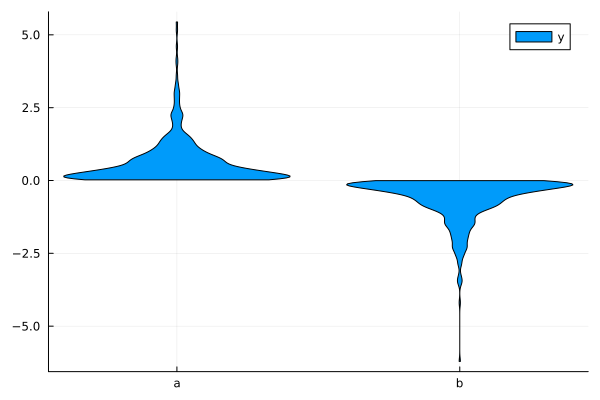

In [61]:
@df df violin(:z, :w, label="y") 